Talari Shreya
2209678324
Roll.No.50
Section_A_Batch2
Week_3_Bollywood

# EXERCISE 2: Descriptive Analytics and Visualization

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("bollywood.csv")
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


# Q-1 How many records are present in the dataset?

In [13]:
print(len(df.index))

149


# Q-2 How many movies got released in each genre? Sort number of releases in each genre in descending order.

In [14]:
df1=df.groupby('Genre').count()
df1.sort_values('SlNo',ascending=0)

,SlNo,Release Date,MovieName,ReleaseTime,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
Genre,,,,,,,,,
Comedy,36,36,36,36,36,36,36,36,36
Drama,35,35,35,35,35,35,35,35,35
Thriller,26,26,26,26,26,26,26,26,26
Romance,25,25,25,25,25,25,25,25,25
Action,21,21,21,21,21,21,21,21,21
Action,3,3,3,3,3,3,3,3,3
Thriller,3,3,3,3,3,3,3,3,3


In [15]:
df.Genre.value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

# Q-3 Which genre had highest number of releases?

In [16]:
print("Genre which had the highest number of releases are:")

#nlargest() method is used to get n largest values from data frame or a series.
df.value_counts(ascending=True).nlargest(n=1)

Genre which had the highest number of releases are:


SlNo  Release Date  MovieName  ReleaseTime  Genre    Budget  BoxOfficeCollection  YoutubeViews  YoutubeLikes  YoutubeDislikes
1     18-Apr-14     2 States   LW           Romance  36      104.0                8576361       26622         2527               1
dtype: int64

# Q-4 How many movies in each genre got released in different release times  like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre andReleaseTime.)


In [22]:
pd.crosstab(df["Genre"],df["ReleaseTime"])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


# Q-5 Which month of the year, maximum number movie releases are seen? (Note: Extract anew column called month from ReleaseDate column

In [23]:
months={1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

df['Release Date']=pd.to_datetime(df['Release Date'])
df['Month']=df['Release Date'].dt.month
month_count=df.Month.value_counts(ascending=False)
most_released_month=month_count.idxmax()
print("most movies have released in the month: ",months[most_released_month])

most movies have released in the month:  Jan


# Q-6 Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 core or more?

In [20]:
high_budget=df[df.Budget>=25]
month_count_budget=high_budget.Month.value_counts(ascending=False)
most_budget_month=month_count_budget.idxmax()
print("most high budget movies has released in the month:",months[most_budget_month])

most high budget movies has released in the month: Feb


# Q-7 Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.


In [25]:
df['ROI']=(df['BoxOfficeCollection']-df['Budget'])/df['Budget']
high_roi_movies=df.nlargest(10,'ROI')
print(high_roi_movies[['MovieName','ROI','Budget','BoxOfficeCollection']])

                     MovieName       ROI  Budget  BoxOfficeCollection
64                  Aashiqui 2  8.166667      12                110.0
89                          PK  7.647059      85                735.0
132                Grand Masti  7.514286      35                298.0
135               The Lunchbox  7.500000      10                 85.0
87                      Fukrey  6.240000       5                 36.2
58                    Mary Kom  5.933333      15                104.0
128                     Shahid  5.666667       6                 40.0
37   Humpty Sharma Ki Dulhania  5.500000      20                130.0
101         Bhaag Milkha Bhaag  4.466667      30                164.0
115            Chennai Express  4.266667      75                395.0


# Q-8 Do the movies have higher ROI if they get released on festive seasons or longweekend? Calculate the average ROI for different release times.

In [26]:
roi_time=df.groupby(by='ReleaseTime')["ROI"].mean()
print("Movies with highest roi are released during:",roi_time.idxmax())

Movies with highest roi are released during: LW


# Q-9 Is there a correlation between box office collection and YouTube likes? Is thecorrelation positive or negative? 

<AxesSubplot:xlabel='YoutubeLikes', ylabel='BoxOfficeCollection'>

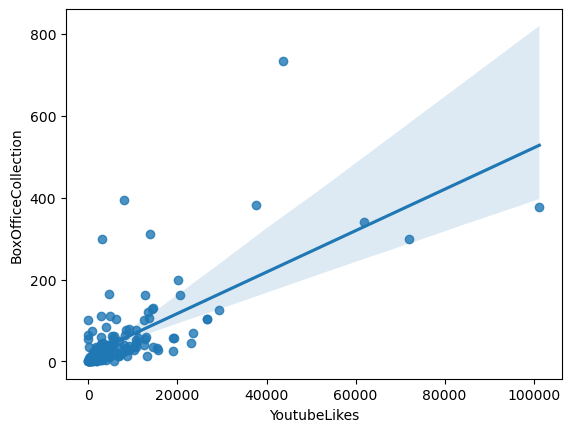

In [27]:
import seaborn as sns

#Best fit line
sns.regplot(x='YoutubeLikes',y='BoxOfficeCollection',data=df)

# Q-10 Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

In [29]:
pd.crosstab(df["Genre"],df["YoutubeLikes"])

YoutubeLikes,1,8,9,33,61,76,86,89,139,192,...,22977,23590,26560,26622,29246,37585,43767,61805,72070,101275
Genre,,,,,,,,,,,,,,,,,,,,,
Drama,1,0,0,0,0,0,1,0,0,0,...,1,1,1,0,0,1,1,0,0,0
Action,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
Action,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Comedy,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Romance,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Thriller,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Genre', ylabel='YoutubeLikes'>

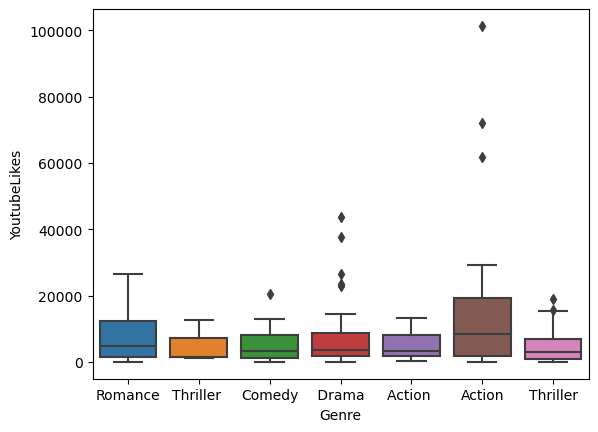

In [30]:
sns.boxplot(x='Genre',y='YoutubeLikes',data=df)

# Q-11 . Which of the variables among Budget, BoxOfficeCollection, YoutubeView,YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or
heatmap. 

<AxesSubplot:>

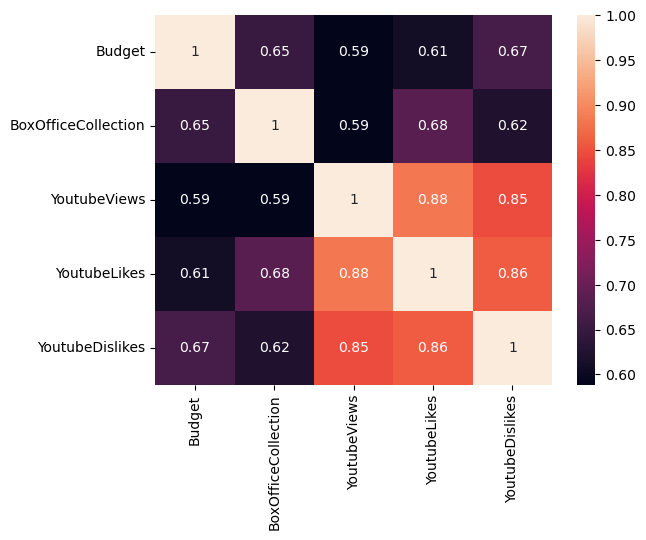

In [32]:
#heatmap
sns.heatmap(df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr(),annot=True)

# Q-12 During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph.

<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

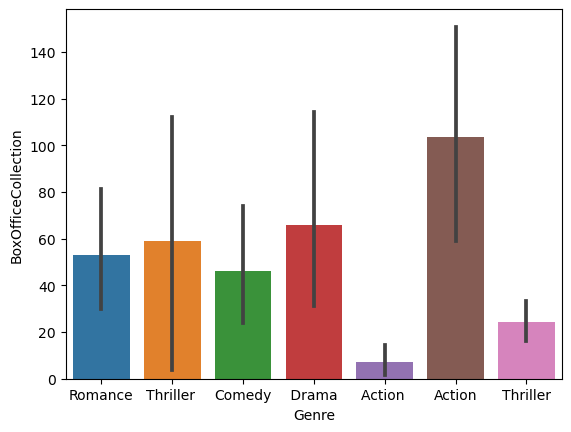

In [34]:
##bar graph of genre and its average boxoffice collection
sns.barplot(data=df,x='Genre',y='BoxOfficeCollection')

# Q-13 Visualize the Budget and Box office collection based on Genre. 

<AxesSubplot:xlabel='Genre', ylabel='BoxOfficeCollection'>

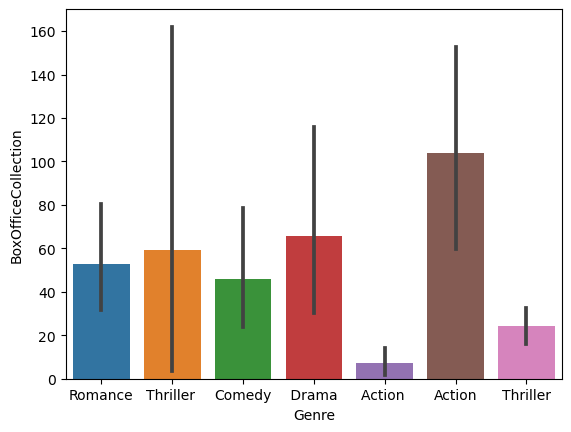

In [35]:
sns.barplot(data=df,x='Genre',y='BoxOfficeCollection')

# Q-14 Find the distribution of movie budget for every Genre. 

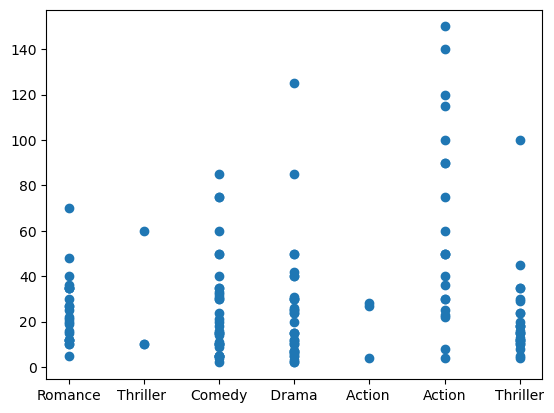

In [38]:
plt.scatter(df.Genre,df.Budget)

# Q-15 During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.

In [40]:
df['Year']=pd.DatetimeIndex(df['Release Date']).year
df['Year']

0      2014
1      2013
2      2014
3      2013
4      2014
       ... 
144    2015
145    2015
146    2015
147    2015
148    2014
Name: Year, Length: 149, dtype: int64

<AxesSubplot:xlabel='Year'>

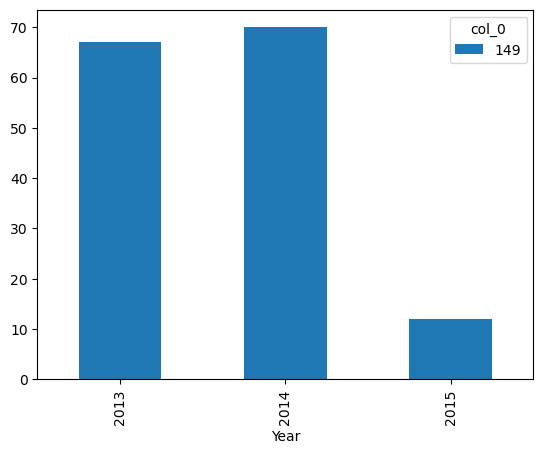

In [43]:
#number of movies releases per year
pd.crosstab(df.Year,df.shape[0])

#visualization of number of movies per year
pd.crosstab(df.Year,df.shape[0]).plot.bar()